In [2]:
!pip install -U okpy  # Uncomment if you have an error
from client.api.notebook import Notebook
ok = Notebook('hw1.ok')

Assignment: hw1
OK, version v1.18.1



# HW 1: Math Review and Plotting
## Due Date: Fri 3/26, 11:59 PM

**Collaboration Policy:** You may talk with others about the homework, but we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following line.

**Collaborators**: *list collaborators here (if applicable)*

## This Assignment

This homework is to help you diagnose your preparedness for the course. The rest of this course will assume familiarity with the programming and math concepts covered in this homework. Please consider reviewing prerequisite material if you struggle with this homework.

## Score Breakdown
Question | Points
--- | ---
1 | 1
2a | 1
2b | 1
2c | 1
2d | 1
3a | 4
3b | 2
4a | 2
4b | 2
5 | 2
6a | 2
6b | 1
6c | 1
7 | 5
Total | 30

Here are some useful Jupyter notebook keyboard shortcuts.  To learn more keyboard shortcuts, go to **Help -> Keyboard Shortcuts** in the menu above. 

Here are a few we like:
1. `ctrl`+`return` : *Evaluate the current cell*
1. `shift`+`return`: *Evaluate the current cell and move to the next*
1. `esc` : *command mode* (may need to press before using any of the commands below)
1. `a` : *create a cell above*
1. `b` : *create a cell below*
1. `dd` : *delete a cell*
1. `m` : *convert a cell to markdown*
1. `y` : *convert a cell to code*

### Initialize your environment

This cell should run without error if you have **set up your personal computer correctly**.

In [3]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.display import display, Latex, Markdown

<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />

## Python
### Question 1 (1 pt)
Recall the formula for population variance below:

$$\texttt{Mean}({\bf{x}}) = \mu = \frac{1}{N}\sum_{i=1}^N x_i$$

$$\texttt{Var}({\bf{x}}) = \sigma^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2$$

Complete the functions below to compute the variance of `population`, an array of numbers. For this question, do not use built-in NumPy functions (i.e. `np.mean` and `np.var`); instead we will use NumPy to verify your code.

<!--
BEGIN QUESTION
name: q1
points: 1
-->

In [4]:
def mean(population):
    """
    Compute the mean of population (mu).
    
    Args:
        population: a numpy array of numbers of shape [N,]
    Returns:
        the mean of population (mu).
    """
    # Calculate the mean of a population
    # BEGIN YOUR CODE
    # -----------------------
    return sum(population) / len(population)
    # -----------------------
    # END YOUR CODE

def variance(population):
    """
    Compute the variance of population (sigma squared).
    
    Args:
        population: a numpy array of numbers of shape [N,]
    Returns:
        the variance of population
    """
    # Calculate the variance of a population
    # BEGIN YOUR CODE
    # -----------------------
    mean = sum(population) / len(population)
    variance_result = sum((num - mean) ** 2 for num in population) / len(population)
    return variance_result
    # -----------------------
    # END YOUR CODE

In [5]:
ok.grade("q1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



---
## NumPy

You should be able to understand the code in the following cells. If not, please review the following:

* [UC Berkeley DS100 NumPy Review](http://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html)
* [Stanford Condensed NumPy Review](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [The Official NumPy Tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
* [UC Berkeley Data 8 Textbook Chapter on NumPy](https://www.inferentialthinking.com/chapters/05/1/Arrays)

**Jupyter pro-tip**: Pull up the docs for any function in Jupyter by running a cell with
the function name and a `?` at the end:

In [6]:
np.arange?

You can close the window at the bottom by pressing `esc` several times. 

**Another Jupyter pro-tip**: Pull up the docs for any function in Jupyter by typing the function
name, then `<Shift>-<Tab>` on your keyboard. This is super convenient when you forget the order
of the arguments to a function. You can press `<Tab>` multiple times to expand the docs and reveal additional information.

Try it on the function below:

In [7]:
np.linspace

<function numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)>

Now, let's go through some linear algebra coding questions with NumPy. In this question, we'll ask you to use your linear algebra knowledge to fill in NumPy matrices. To conduct matrix multiplication in NumPy, you should write code like the following:

In [8]:
# A matrix in NumPy is a 2-dimensional NumPy array
matA = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

matB = np.array([
    [10, 11],
    [12, 13],
    [14, 15],
])

# The notation B @ v means: compute the matrix multiplication Bv
matA @ matB

array([[ 76,  82],
       [184, 199]])

You can also use the same syntax to do matrix-vector multiplication or vector dot products. Handy!

In [9]:
matA = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

# A vector in NumPy is simply a 1-dimensional NumPy array
some_vec = np.array([ 10, 12, 14, ])
another_vec = np.array([ 10, 20, 30 ])

print(matA @ some_vec)
print(some_vec @ another_vec)

[ 76 184]
760


<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />

## Question 2 (4 pt)
### Question 2a

Joey, Deb, and Sam are shopping for fruit at K-Bowl. K-Bowl, true to its name, only sells fruit bowls. A fruit bowl contains some fruit and the price of a fruit bowl is the total price of all of its individual fruit.

Berkeley Bowl has apples for \\$2.00, bananas for \\$1.00, and cantaloupes for \\$4.00 (expensive!). The price of each of these can be written in a vector:

$$
v = \begin{bmatrix}
     2 \\
     1 \\
     4 \\
\end{bmatrix}
$$

K-Bowl sells the following fruit bowls:

1. 2 of each fruit
2. 5 apples and 8 bananas
3. 2 bananas and 3 cantaloupes
4. 10 cantaloupes

Create a 2-dimensional numpy array encoding the matrix $B$ such that the matrix-vector multiplication

$$
Bv
$$

evaluates to a length 4 column vector containing the price of each fruit bowl. The first entry of the result should be the cost of fruit bowl #1, the second entry the cost of fruit bowl #2, etc.

<!--
BEGIN QUESTION
name: q2a
points: 1
-->

In [10]:
v = np.array([2,1,4])

# BEGIN YOUR CODE
# -----------------------
B = np.array([[2,2,2],[5,8,0], [0,2,3], [0,0,10]])
# -----------------------
# END YOUR CODE

# The notation B @ v means: compute the matrix multiplication Bv
B @ v

array([14, 18, 14, 40])

In [11]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2b

Joey, Deb, and Sam make the following purchases:

- Joey buys 2 fruit bowl #1s and 1 fruit bowl #2.
- Deb buys 1 of each fruit bowl.
- Sam buys 10 fruit bowl #4s (he really like cantaloupes).

Create a matrix $A$ such that the matrix expression

$$
ABv
$$

evaluates to a length 3 column vector containing how much each of them spent. The first entry of the result should be the total amount spent by Joey, the second entry the amount sent by Deb, etc.

Note that the tests for this question do not tell you whether your answer is correct. That's up to you to determine.

<!--
BEGIN QUESTION
name: q2b
points: 1
-->

In [12]:
A = np.array([
    [2, 1, 0, 0], # Joey
    # Finish this!
    # BEGIN YOUR CODE
    # -----------------------
    [1,1,1,1], # Deb
    [0,0,0,10] # Sam
    # -----------------------
    # END YOUR CODE
]) 
A @ B @ v 

array([ 46,  86, 400])

In [13]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2c

Who spent the most money? Assign `most` to a string containing the name of this person.

<!--
BEGIN QUESTION
name: q2c
points: 1
-->

In [14]:
# BEGIN YOUR CODE
# -----------------------
most = 'Sam' # assign String
# -----------------------
# END YOUR CODE

In [15]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2d

Let's suppose K-Bowl changes their fruit prices, but you don't know what they changed their prices to. Joey, Deb, and Sam buy the same quantity of fruit baskets and the number of fruit in each basket is the same, but now they each spent these amounts:

$$
x = \begin{bmatrix}
    80 \\
    80 \\
    100 \\
\end{bmatrix}
$$

Use `np.linalg.inv` and the above final costs to compute the new prices for the individual fruits as a vector called `new_v`.

<!--
BEGIN QUESTION
name: q2d
points: 1
-->

In [16]:
# BEGIN YOUR CODE
# -----------------------
new_v = np.linalg.inv(A@B) @ [80,80,100] # 이 코드가 왜 맞지?
# -----------------------
# END YOUR CODE
new_v

array([5.5       , 2.20833333, 1.        ])

In [17]:
tmp = ok.grade("q2d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



---
## Multivariable Calculus, Linear Algebra, and Probability

The following questions ask you to recall your knowledge of multivariable calculus, linear algebra, and probability. We will use some of the most fundamental concepts from each discipline in this class, so the following problems should at least seem familiar to you.

If you have trouble with these topics, we suggest reviewing:

- [Khan Academy's Multivariable Calculus](https://www.khanacademy.org/math/multivariable-calculus)
- [Khan Academy's Linear Algebra](https://www.khanacademy.org/math/linear-algebra)
- [Khan Academy's Statistics and Probability](https://www.khanacademy.org/math/statistics-probability)


#### LaTeX

For the following problems, you should use LaTeX to format your answer. If you aren't familiar with LaTeX, not to worry. It's not hard to use in a Jupyter notebook. Just place your math in between dollar signs:

\\$ f(x) = 2x \\$ becomes $ f(x) = 2x $.

If you have a longer equation, use double dollar signs to place it on a line by itself:

\\$\\$ \sum_{i=0}^n i^2 \\$\\$ becomes:

$$ \sum_{i=0}^n i^2 $$.

Here is some handy notation:

| Output | Latex   |
|:---|:---|
| $$x^{a + b}$$  | `x^{a + b}` |
| $$x_{a + b}$$ | `x_{a + b}` |
| $$\frac{a}{b}$$ | `\frac{a}{b}` |
| $$\sqrt{a + b}$$ | `\sqrt{a + b}` |
| $$\{ \alpha, \beta, \gamma, \pi, \mu, \sigma^2  \}$$ | `\{ \alpha, \beta, \gamma, \pi, \mu, \sigma^2  \}` |
| $$\sum_{x=1}^{100}$$ | `\sum_{x=1}^{100}` |
| $$\frac{\partial}{\partial x} $$ | `\frac{\partial}{\partial x} ` |
| $$\begin{bmatrix} 2x + 4y \\ 4x + 6y^2 \\ \end{bmatrix}$$ | `\begin{bmatrix} 2x + 4y \\ 4x + 6y^2 \\ \end{bmatrix}`|



[For more about basic LaTeX formatting, you can read this article.](https://www.sharelatex.com/learn/Mathematical_expressions)

<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />

### Question 3a (4 pt)

Suppose we have the following scalar-valued function:

$$ f(x, y) = x^2 + 4xy + 2y^3 + e^{-3y} + \ln(2y) $$

Compute the partial derivative $\frac{\partial}{\partial x} f(x,y)$: `번역하면 편미분`

<!--
BEGIN QUESTION
name: q4ai
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

**Answer**:  $\frac{\partial}{\partial x} f(x,y)$ = $ 2x + 4y $ 

Now compute the partial derivative $\frac{\partial}{\partial y} f(x,y)$: 

`참고 : ` 
1. $ \frac{\partial}{\partial x} e^{x} = e^{x} $ 
2. $ \frac{\partial}{\partial x} e^{ax} = ae^{ax} $

<!--
BEGIN QUESTION
name: q4aii
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

**Answer**: $\frac{\partial}{\partial y} f(x,y)$ = $ 4x + 6y -3e^{-3y} + \frac{1}{y} $

Finally, using your answers to the above two parts, compute $\nabla f(x, y)$. Also what is the gradient at the point (x, y) = (2, -1):

Note that $\nabla$ represents the gradient.

<!--
BEGIN QUESTION
name: q4aiii
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

`gradient가 2개의 합은 아니다. x방향의 기울기와 y방향의 기울기가 튜플 형태다`

$\nabla f(x, y)$ = ($\frac{\partial}{\partial x} f(x,y)$, $\frac{\partial}{\partial y} f(x,y)$) <br><br>
$\nabla f(x, y)$ = ($\frac{\partial}{\partial x} f(2,-1)$, $\frac{\partial}{\partial y} f(2,-1)$) <br><br>
**Answer**: $\nabla f(x, y)$ = $ (0,1-3e^{3}) $

### Question 3b (2 pt)

Find the value(s) of $x$ which minimizes the expression below. Justify why it is the minimum.

$\sum_{i=1}^{10} (i - x)^2$

<!--
BEGIN QUESTION
name: q4b
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

According to Specify the formula above, I can see a quadratic formula below.

- $\sum_{i=1}^{10} (i - x)^2$ = $ 10x^{2} - 110x + 385 $

### Solution 1 : Use Matplotlib & Scipy

If you draw a graph using matplotlib according to the given quadratic function, it is created in the form below.

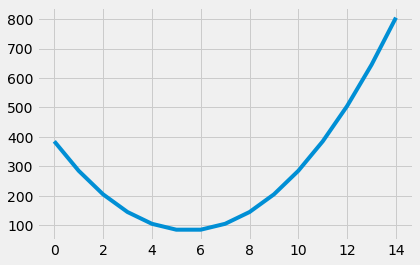

In [18]:
x= np.arange(0, 15)
y = 10 * (x**2) - (110 * x) + 385
plt.plot(x,y)
plt.show()

As you can see, the minimum value of x in this function is between 4 and 6. However, We still have no idea the minimum value of x in the function. So, we can use `Scipy` and find the minimum x.

In [19]:
from scipy.optimize import minimize_scalar
def minimize_x(x):
  return 10 * (x**2) - (110 * x) + 385
res = minimize_scalar(minimize_x)
opt_x, opt_y = res.x, res.fun
print('x: {}, y: {}'.format(opt_x, opt_y))

x: 5.500000081409997, y: 82.50000000000006


Therefore, we can find `the minimum value of x is approximately 5.5`

### Solution 2 : Use Gradient

we can use gradient from `Q3a` solution <br>

- $f(x, y) = 10x^{2} - 110x + 385 $ <br><br>
- $\frac{\partial}{\partial x} f(x,y)$ = $ 20x - 110 $ <br><br>

According to the formula above, `the minimum value of x is 5.5` (Because 5.5 makes the gradient 0)

`Answer: x = 5.5`

<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />


### Question 4a (2 pt)
Let $\sigma(x) = \dfrac{1}{1+e^{-x}}$. `시그모이드 함수`

Show that $\sigma(-x) = 1 - \sigma(x)$.

<!--
BEGIN QUESTION
name: q4c
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

Answer: <br><br>
1. $ \sigma(x) = \dfrac{e^{x}}{e^{x}+1} $ <br><br>
2. $ \sigma(x) = \dfrac{e^{x} + 1 - 1}{e^{x}+1} $ <br><br>
3. $ \sigma(x) = \dfrac{e^{x} + 1}{e^{x}+1} - \dfrac{1}{e^{x}+1} $ <br><br>
4. $ \sigma(x) = 1 - \sigma(-x) $ <br><br>
5. Therefore, $ \sigma(-x)= 1 - \sigma(x) $ <br><br>

### Question 4b (2 pt)
Show that the derivative can be written as:

$$\frac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x))$$

<!--
BEGIN QUESTION
name: q4d
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

Answer: <br>
1. $ \frac{\partial}{\partial x}\sigma(x) = \frac{\partial}{\partial x}\dfrac{1}{1+e^{-x}} $ <br>

2. $                                      = \dfrac{e^{-x}}{(1+e^{-x})^{2}} $ <br><br>
3. $                                      = \dfrac{1}{1+e^{-x}} . \dfrac{e^{-x}}{1+e^{-x}} $ <br><br>
4. Therefore, $ \frac{\partial}{\partial x}\sigma(x) = \sigma(x)(1 - \sigma(x))$

<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />

### Question 5 (2 pt)

Consider the following scenario:

Only 1% of 40-year-old women who participate in a routine mammography test have breast cancer. 80% of women who have breast cancer will test positive, but 9.6% of women who don’t have breast cancer will also get positive tests. 

Suppose we know that a woman of this age tested positive in a routine screening. What is the probability that she actually has breast cancer?

**Hint:** Use Bayes' rule.

<!--
BEGIN QUESTION
name: q5
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

Answer: `Approximately 7.7% or 7.8%`

`Explanation` <br>
1. 40-year-old women who have breast cancer with test positive
<br> $ P(BC-O | Po) = 0.8 $
2. 40-year-old women who have `NOT` breast cancer with test positive
<br> $ P(BC-X | Po) = 0.096 $
3. 1% of 40-year-old women who have breast cancer
<br> $P(40-b-Cancer) = 0.01 $
4. The other of 40-year-old women who have `NOT` breast cancer
<br> $ P(40-NOT-b-Cancer) = 0.99 $ 
5. $ P(Positive) = P(40-b-Cancer) * P(BC-O | Po) + P(40-NOT-b-Cancer) * P(BC-X | Po) $ <br>
6. `About 10.3% of 40-year-old women will test positive`
<br> $ P(Positive) = 0.01 * 0.8 + 0.99 * 0.096 = 0.1034 $ 
7. 40-year-old women who has breast cancer among the test result, positive
<br> $ P(Po|BC-O) = P(40-b-Cancer) * P(BC-O | Po) / P(Positive) $ 
8. The Answer
<br> $ P(Po|BC-O) = 0.008 / 0.1034 $ = `0.077369...(Approximately 7.7%)`

*Appendix* <br>
- If I calculate 0.1034 to 0.103 (round) then the result will be `0.776699...(Approximately 7.8%)`

<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />

### Question 6

Consider (once again) a sample of size n drawn at random with replacement from a population in which a proportion p of the individuals are called successes.

Let S be the random variable that denotes the number of successes in our sample. (As stated above, S follows the binomial distribution.) Then, the probability that the number of successes in our sample is **at most** s (where $0 \leq s \leq n$) is

$$P(S \leq s) = P(S = 0) + P(S = 1) + ... + P(S = s) = \sum_{k=0}^s \binom{n}{k}p^k(1-p)^{n-k}$$

We obtain this by summing the probability that the number of successes is exactly k, for each value of $k = 0, 1, 2, ..., s$.

### Question 6a (2pt)

Please fill in the function `prob_at_most` which takes n, p, and s and returns $P(S \le s)$ as defined above. If the inputs are invalid: for instance, if p > 1 or s > n then return 0." 

**Hint**: One way to compute the binomial coefficients is to use SciPy module, which is a collection of Python-based software for math, probability, statistics, science, and enginnering. Feel free to use [scipy.special.comb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html#scipy.special.comb)**

<!--
BEGIN QUESTION
name: q6a
manual: false
points: 1
-->

In [20]:
from scipy import special
def prob_at_most(n, p, s):
    """ 
    returns the probability of S <= s
    Input n: sample size; p : proportion; s: number of successes at most
    """
    # BEGIN YOUR CODE
    # -----------------------
    if p > 1 or s > n: # If the inputs are invalid: for instance, if p > 1 or s > n then return 0."
        return 0
    
    rep = 1-p # replacement of 1-p in sigma
    k_list = range(0,s+1) # sigma range
    result = 0
    for k in k_list:
        result += (special.comb(n,k) * (p**k)*(rep**(n-k)))
    return result
    # -----------------------
    # END YOUR CODE

In [21]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b (1pt)

In an election, supporters of Candidate C are in a minority. Only 45% of the voters in the population favor the candidate.

Suppose a survey organization takes a sample of 200 voters at random with replacement from this population. Use `prob_at_most` to write an expression that evaluates to the chance that a majority (more than half) of the sampled voters favor Candidate C.

<!--
BEGIN QUESTION
name: q6b
manual: false
points: 1
-->

In [22]:
# BEGIN YOUR CODE
# -----------------------
p_majority = prob_at_most(200,0.45,101)
p_majority
# -----------------------
# END YOUR CODE

0.9486329671752122

In [23]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6c (1pt)

Suppose each of five survey organizations takes a sample of voters at random with replacement from the population of voters in Part **b**, independently of the samples drawn by the other organizations. 

- Three of the organizations use a sample size of 200
- One organization uses a sample size of 300
- One organization uses a sample size of 400

Write an expression that evaluates to the chance that in at least one of the five samples the majority of voters favor Candidate C. You can use any quantity or function defined earlier in this exercise.

<!--
BEGIN QUESTION
name: q6c
manual: false
points: 2
-->

In [134]:
# BEGIN YOUR CODE
# -----------------------
prob_6c = ...
# -----------------------
# END YOUR CODE

In [38]:
ok.grade("q6c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q6c > Suite 1 > Case 1

>>> prob_6c >= 0 and prob_6c <= 1
TypeError: '>=' not supported between instances of 'list' and 'int'

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: '>=' not supported between instances of 'list' and 'int'

Run only this test case with "python3 ok -q q6c --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />


## The US Presidential Election

The US president is chosen by the Electoral College, not by the
popular vote. Each state is alotted a certain number of 
electoral college votes, as a function of their population.
Whomever wins in the state gets all of the electoral college votes for that state.

There are 538 electoral college votes (hence the name of the Nate Silver's site, FiveThirtyEight).

Pollsters correctly predicted the election outcome in 46 of the 50 states. 
For these 46 states Trump received 231 and Clinton received 232 electoral college votes.

The remaining 4 states accounted for a total of 75 votes, and 
whichever candidate received the majority of the electoral college votes in these states would win the election. 

These states were Florida, Michigan, Pennsylvania, and Wisconsin.

|State |Electoral College Votes|
| --- | --- |
|Florida | 29 |
|Michigan | 16 |
|Pennsylvania | 20 |
|Wisconsin | 10|

For Donald Trump to win the election, he had to win either:
* Florida + one (or more) other states
* Michigan, Pennsylvania, and Wisconsin


The electoral margins were very narrow in these four states, as seen below:


|State | Trump |   Clinton | Total Voters |
| --- | --- |  --- |  --- |
|Florida | 49.02 | 47.82 | 9,419,886  | 
|Michigan | 47.50 | 47.27  |  4,799,284|
|Pennsylvania | 48.18 | 47.46 |  6,165,478|
|Wisconsin | 47.22 | 46.45  |  2,976,150|

Those narrow electoral margins can make it hard to predict the outcome given the sample sizes that the polls used. 

### Question 7a (1pt)

For your convenience, the results of the vote in the four pivotal states is repeated below:

|State | Trump |   Clinton | Total Voters |
| --- | --- |  --- |  --- |
|Florida | 49.02 | 47.82 | 9,419,886  | 
|Michigan | 47.50 | 47.27  |  4,799,284|
|Pennsylvania | 48.18 | 47.46 |  6,165,478|
|Wisconsin | 47.22 | 46.45  |  2,976,150|


Using the table above, write a function `draw_state_sample(N, state)` that returns a sample with replacement of N voters from the given state. Your result should be returned as a list, where the first element is the number of Trump votes, the second element is the number of Clinton votes, and the third is the number of Other votes. For example, `draw_state_sample(1500, "florida")` could return `[727, 692, 81]`. You may assume that the state name is given in all lower case.

You might find `np.random.multinomial` useful.

<!--
BEGIN QUESTION
name: q6a
points: 2
-->

In [27]:
def draw_state_sample(N, state):
    # BEGIN YOUR CODE
    # -----------------------
    election_sample = {'florida': [0.4902,0.4782,0.0316], # "state": [Trump, Clinton, others]
                       "michigan":[0.4750,0.4727,0.0523], 
                       'pennsylvania':[0.4818,0.4746,0.0436],
                       "wisconsin":[0.4722,0.4645,0.0633]
                      }
    drawing_sample = np.random.multinomial(N,election_sample[state])
    return  drawing_sample
    # -----------------------
    # END YOUR CODE

In [28]:
ok.grade("q7a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 7b (1pt)

Now, create a function `trump_advantage` that takes in a sample of votes (like the one returned by `draw_state_sample`) and returns the difference in the proportion of votes between Trump and Clinton. For example `trump_advantage([100, 60, 40])` would return `0.2`, since Trump had 50% of the votes in this sample and Clinton had 30%.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [29]:
def trump_advantage(voter_sample):
    # BEGIN YOUR CODE
    # -----------------------
    trump_rate = voter_sample[0] / sum(voter_sample)
    clinton_rate = voter_sample[1] / sum(voter_sample)
    return trump_rate - clinton_rate
    # -----------------------
    # END YOUR CODE

In [30]:
ok.grade("q7b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 7c (1pt)

Simulate Trump's advantage across 100,000 samples of 1500 voters for the state of Pennsylvania and store the results of each simulation in a list called `simulations`. 

That is, `simulations[i]` should be Trump's proportion advantage for the `i+1`th simple random sample.

<!--
BEGIN QUESTION
name: q6c
points: 1
-->

In [31]:
# BEGIN YOUR CODE
# -----------------------
samples = [draw_state_sample(1500, "pennsylvania") for i in range(100000)]
simulations = [trump_advantage(sample) for sample in samples]
# -----------------------
# END YOUR CODE

In [32]:
ok.grade("q7c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<!-- END QUESTION -->

### Question 7d (1pt)

Now write a function `trump_wins(N)` that creates a sample of N voters for each of the four crucial states (Florida, Michigan, Pennsylvania, and Wisconsin) and returns 1 if Trump is predicted to win based on these samples and 0 if Trump is predicted to lose.

Recall that for Trump to win the election, he must either:
* Win the state of Florida and 1 or more other states
* Win Michigan, Pennsylvania, and Wisconsin

<!--
BEGIN QUESTION
name: q6e
manual: false
points: 2
-->

In [42]:
def trump_wins(N):
    # BEGIN YOUR CODE
    # -----------------------
    states = ["florida","michigan", "pennsylvania","wisconsin"] # key for draw_state_sample function
    states_sample = [draw_state_sample(N,state) for state in states] # draw sample of each states
    state_proportion = [trump_advantage(sample) for sample in states_sample] # find trump proportion for each states
    print(state_proportion)
    if state_proportion[0] > 0 and min(state_proportion[1:]) > 0: # state_proportion[0] -> florida
        return 1
    else:
        return 0
    # -----------------------
    # END YOUR CODE

[-0.010666666666666658, 0.05666666666666664, 0.010666666666666713, 0.05666666666666664]


1

In [43]:
ok.grade("q7d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q7d > Suite 1 > Case 1

>>> trump_wins(1000) in [0, 1]
[0.01200000000000001, 0.022999999999999965, 0.03199999999999997, 0.00599999999999995]
True

# Error: expected
#     True
# but got
#     [0.01200000000000001, 0.022999999999999965, 0.03199999999999997, 0.00599999999999995]
#     True

Run only this test case with "python3 ok -q q7d --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



### Question 7e

If we repeat 100,000 simulations of the election, i.e. we call `trump_wins(1500)` 100,000 times, what proportion of these simulations predict a Trump victory? Give your answer as `proportion_trump`.

This number represents the percent chance that a given sample will correctly predict Trump's victory *even if the sample was collected with absolutely no bias*. 

<!--
BEGIN QUESTION
name: q6f
manual: false
points: 1
-->

In [37]:
# BEGIN YOUR CODE
# -----------------------
victory_trump = [1 for i in range(100000) if trump_wins(1500)]
proportion_trump = len(victory_trump) / 100000
# -----------------------
# END YOUR CODE
proportion_trump

0.979

In [38]:
ok.grade("q7e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q7e > Suite 1 > Case 2

>>> abs(proportion_trump - 0.695) <= 0.02
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q7e --suite 1 --case 2"
---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 1
[oooook.....] 50.0% passed



<br/><br/><br/>
<br/><br/><br/>
<hr style="border: 5px solid #990000;" />
<hr style="border: 1px solid #dbbcac;" />

### Congratulations! You have completed HW1.

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.,

**Please save before submitting!**

For your convenience, you can run this cell to run all the tests at once!

In [28]:
import os
from IPython.utils import io

print('{:5}|\t{:6}|\t{:6}'.format('Q', 'Passed', 'Failed'))
print('------------------------')
for q in sorted(os.listdir("tests")):
    if q.startswith('q') and len(q) <= 10:
        with io.capture_output() as captured:
            score = ok.grade(q[:-3]);
        print('{:5}|\t{:6}|\t{:6}'.format(q[:-3], score['passed'], score['failed']))

Q    |	Passed|	Failed
------------------------
q1   |	     4|	     0
q2a  |	     2|	     0
q2b  |	     2|	     0
q2c  |	     2|	     0
q2d  |	     2|	     0
q6a  |	     3|	     0
q6b  |	     1|	     0
q6c  |	     0|	     1
q7a  |	     2|	     0
q7b  |	     1|	     0
q7c  |	     0|	     1
q7d  |	     0|	     1
q7e  |	     0|	     1


Please generate pdf as follows and submit it to Gradescope.

**File > Print Preview > Print > Save as pdf**